<a href="https://colab.research.google.com/github/Raj9984/Cifar10_Image_Classifier-/blob/main/CNN_Based_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

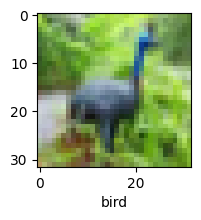

In [ ]:
plot_sample(x_train,y_train,6)

## Normalising all the values in the X_Train dataset -> dividing by 255 so that their value comes in 0-1 range.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Model Building and Training

In [ ]:
model = models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                          layers.Dense(3000, activation = 'relu'),
                          layers.Dense(1000, activation = 'relu'),
                          layers.Dense(10, activation = 'sigmoid')])

model.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'] )
#when output is one-hot encoded we use categorical_crossentropy and when the output is a
# specific value then we use sparse_categorical_crossentropy.
model.fit(x_train, y_train, epochs = 8)

Epoch 1/8
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8120 - accuracy: 0.3535
Epoch 2/8
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6223 - accuracy: 0.4245
Epoch 3/8
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5399 - accuracy: 0.4558
Epoch 4/8
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4799 - accuracy: 0.4770
Epoch 5/8
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4304 - accuracy: 0.4940
Epoch 6/8
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3888 - accuracy: 0.5105
Epoch 7/8
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3490 - accuracy: 0.5265
Epoch 8/8
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3149 - accuracy: 0.5374


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3941 - accuracy: 0.5077


[1.3940726518630981, 0.5077000260353088]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.62      0.56      1000
           1       0.60      0.69      0.64      1000
           2       0.52      0.18      0.27      1000
           3       0.37      0.28      0.32      1000
           4       0.58      0.26      0.36      1000
           5       0.36      0.53      0.43      1000
           6       0.51      0.61      0.56      1000
           7       0.51      0.64      0.57      1000
           8       0.61      0.67      0.64      1000
           9       0.55      0.60      0.57      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.49     10000
weighted avg       0.51      0.51      0.49     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4870 - accuracy: 0.4613
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1329 - accuracy: 0.6005
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0005 - accuracy: 0.6523
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9165 - accuracy: 0.6816
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8590 - accuracy: 0.7014
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8050 - accuracy: 0.7204
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7687 - accuracy: 0.7328
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7327 - accuracy: 0.7459
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6972 - accuracy: 0.7575
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.665

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9016 - accuracy: 0.6939


[0.9016270637512207, 0.6938999891281128]

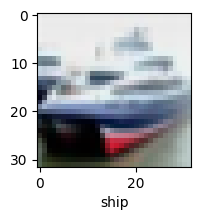

In [ ]:
y_test = y_test.reshape(-1)
plot_sample(x_test,y_test,1)

In [ ]:
ans_test = cnn.predict(x_test)
ans_test_classes = [np.argmax(element) for element in ans_test[:3]]
for ind in y_test[:3] :
    print(classes[ind])

for ind in ans_test_classes:
    print(classes[ind])

313/313 [==============================] - 1s 4ms/step
cat
ship
ship
cat
ship
ship
